high Array size 1258
low Array size 1258
open Array size 1258
close Array size 1258
[ 444.619995  444.660004  456.01001  ... 1500.02002  1524.050049
 1531.420044]
8856.090058000002
442.8045029000001
8867.060059000001
443.3530029500001
8876.400055
443.82000275
8877.400055
443.87000275
8866.460052
443.3230026
8850.900055
442.54500275
8841.800048999998
442.0900024499999
8832.410033999997
441.62050169999986
8834.910033999999
441.7455016999999
8842.100036
442.10500179999997
8855.440031999999
442.77200159999995
8866.850005999999
443.3425002999999
8907.670014
445.38350069999996
8936.300019
446.81500095
8960.740022
448.0370011
8969.200013000001
448.4600006500001
8963.839997000003
448.1919998500001
8974.029999000002
448.7014999500001
8972.970001000002
448.64850005000005
8984.429992000001
449.2214996000001
8964.649994000001
448.23249970000006
8938.26001
446.9130005
8900.050019
445.00250095
8848.300019
442.41500095000004
8783.950013
439.19750065
8734.660004000001
436.73300020000005
8678.890015
43

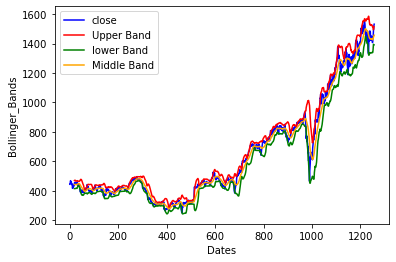

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
df = pd.read_csv('../stock_data/CMG.csv')
array_date = np.array(df['Date'])
array_close = np.array(df['Close'])
array_open = np.array(df['Open'])
array_high = np.array(df['High'])
array_low = np.array(df['Low'])
print("high Array size",array_high.size)
print("low Array size",array_low.size)
print("open Array size",array_open.size)
print("close Array size",array_close.size)
print(array_close)
Bperiods=19
y=0
array_Middleband=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_close[y]
		sum=sum+z
		y=y+1
	print(sum)
	sum=sum/20
	print(sum)
	array_Middleband.append(sum)
	y=y-(Bperiods)
print(len(array_Middleband))
print(array_Middleband)
stndrd_deviation=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
y=0
z=0
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_Middleband[x+Bperiods]
		sum=sum+((z-array_close[y])*(z-array_close[y]))
		y=y+1
	print(sum)
	sum=sum/19
	sum=math.sqrt(sum)
	print(sum)
	stndrd_deviation.append(sum)
	y=y-(Bperiods)
print(len(stndrd_deviation))
print(stndrd_deviation)
upper_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lower_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(Bperiods,len(stndrd_deviation)-1):
	upper_band.append(array_Middleband[x]+(2*stndrd_deviation[x]))
	lower_band.append(array_Middleband[x]-(2*stndrd_deviation[x]))
print(upper_band)
print(len(upper_band))
print(lower_band)
plt.plot(array_close,color='blue',label = 'close')
plt.plot(upper_band,color='red',label = 'Upper Band')
plt.plot(lower_band,color='green',label = 'lower Band')
plt.plot(array_Middleband,color='orange',label = 'Middle Band')
df['Date'] = df['Date'].reset_index()
x=df['Date'].index
labels = array_date[0:]
#plt.xticks(x, labels, rotation = 'vertical')
plt.ylabel('Bollinger_Bands')
plt.xlabel('Dates')
plt.legend()
plt.figure()
plt.show()
